# Understanding ```sympyfy```: An Analytical Momentum-Space Hamiltonian Expresser.

## Introduction ##

The ```sympyfy``` function utilizes the tight-binding (TB) model. The TB model is used in Condensed Matter Physics to study the properties of the band structures of different kinds of conductors, semiconductors, and insulators. 

Wannier90 gives us a broad range of hopping terms. Some are more useful than others. For instance, an electron with a hopping amplitude of 0.00005 eV will not contribute as much to the final Hamiltonian output as an electron with a hopping amplitude of 0.05 eV. There is a need for a cutoff, either in the hopping distances or in the hopping amplitudes. Luckily, using PythTB's ```model``` function, we can initiate a cutoff for both, should we choose. This helps us to keep hopping terms that are going to have the greatest effect on the resulting Hamiltonian, thereby introducing a locality effect where we only consider next-nearest neighbor terms. It is worth noting that these orbital hoppings can be within the same unit cell or across different unit cells.

Like many other models, the TB model has its Hamiltonian equation. This equation has two significant terms, one of which is the hopping term which describes the hopping of electrons between local neighboring sites. This is the term that ```sympyfy``` captures. Although we do not include an interaction term in ```sympyfy```, it is a great starting point in terms of perturbation theory where we look for solutions close to the non-interacting case. Nevertheless, we can capture valuable insights into the electronic properties of materials.

The Hamiltonian of the TB model looks like this:
$$
\hat{H} = \sum_{\vec{R}\vec{\delta}}| \vec{R}> \cal{t} <\vec{R} + \vec{\delta}| + \sum_{\vec{R}} |\vec{R}>U<\vec{R}|
$$

where $\vec{\delta}$ is a set of vectors pointing from $\vec{R}$ to its nearest neighbors.

Condensed matter experimental physicists, as well as theoretical physicists, interface with the TB model in different ways. Experimental physicists can interface with the TB model when performing electronic band structure measurements such as Angle-Resolved Photoemission Spectroscopy (ARPES). They need to know whether their analyses of their experimental data fit with what the theory dictates.

Moreover, the TB model is easily tractable, allowing for an easy-to-view analytical (Hamiltonian) solution for whatever system one analyzes. This tractability proves efficient to experimentalists as it can save time for them to quickly check whether their experimental data makes sense.

There is one issue, though the analytical solution to the TB model is helpful, it can end up being verbose and drawn out, counter to what an experimentalist would like. To drive the point home, an experimentalist would like a succinct, compact analytical expression of the compound they are working with. Therefore, it does them no good to look at a lengthy (Hamiltonian) expression. On top of this, condensed matter physicists are often interested in looking at systems at or near the Fermi level as this is where interesting physics happens, such as when electrons cross from the valence band to the conduction band which is interesting when we look at (super)conductivity and electrical properties.

Therefore, there is a need to develop a function that can provide a reduced analytical Hamiltonian expression of whatever element that is analyzed. This is what ```sympyfy``` does! Let us look at the function definition:

```python
def sympyfy(tb_lat_obj, analytical = True, precision = 6):

The ```w90_triqs``` is a TRIQS TBLattice Object (Tight-Binding Lattice Object) which is the only mandatory parameter in our function. To obtain the ```w90_triqs```, TRIQS fortunately provides functions from which you can convert your model to a TRIQS TBLattice object. These functions are:
1. ```TB_from_pythTB``` which converts your model from a pythTB model to a TRIQS TBLattice Object.
2. ```TB_from_wannier90``` which converts your model from a Wannier90 model to a TRIQS TBLattice Object. It reads wannier90 output and convert it to a TBLattice object.

This makes the ```w90_triqs``` to be the only parameter that interfaces with other TRIQS package functions.
At this time, it is recommended that one use the ```TB_from_pythTB``` as you can easily initiate cutoffs to your pythTB model before converting it to a TBLattice object, especially for complex systems. This allows one to be more in control of their model and look at the behavior of the output at different cutoffs. Such cutoff parameters, possible with the pythTB includes the:
1. ```zero_energy```: sets the zero of the energy in the band structure, which is almost always set at the Fermi level.
2. ```min_hopping_norm```: the hopping terms read from Wannier90. Hopping amplitudes (measured in electron-volts) less than the set ```min_hopping_norm``` will not be included in the resulting calculations.
3. ```max_distance```: Any hopping distance greater than the set ```max_distance``` will be ignored.

The ```analytical``` flag ensures that the default Hamiltonian that is going to be returned once ```sympyfy``` is run is going to be analytical. The user can change the ```analytical``` flag to ```False``` to see the resulting "numerical" Hamiltonian. The use of quotation marks around the word numerical is deliberate because this expression, while less analytical than the default analytical expression, isn't wholly numerical and still depends on the parameters of the k-space vectors, ```kx```, ```ky```, and ```kz``` (the lattice constants and lattice vectors are expressed numerically).  However, for the purpose of this tutorial, I shall continue to term it as numerical hereon, without the quotation marks around it since the user can easily provide values for ```kx```, ```ky```, and ```kz``` to make it entirely numerical.

Finally, the ```precision``` parameter is there for the user to control the number of digits in the hoppings and lattice parameters. A smaller precision value is going to result in a more compact Hamiltonian form but with less precision. Thus, there is a tradeoff to be negotiated there. By default, the floating point values from Wannier90 are in the order of $10^{-6}$. While this is quite precise, it can be difficult to notice similar hopping amplitude values that may arise due to symmetrical hops in opposite directions.

## Calling the Function ##

Let us first load the model on $La_2CuO_4$, Lanthanum Copper Oxide, a high-temperature superconductor:
```python
from triqs.lattice.utils import TB_from_pythTB
w90_input = w90('La2CuO4 Files', 'lco')
fermi_ev = 12.7367
w90_model = w90_input.model(zero_energy = fermi_ev, min_hopping_norm = 0.05, max_distance = None)
w90_triqs_La2CuO4 = TB_from_pythTB(w90_model)
```

Considering the scenarios laid out above, we can imagine calling ```sympyfy``` different cases.
One of the cases would be to output the reduced analytical Hamiltonian.
```python
print("The analytical expression: \n", sympyfy(w90_triqs_La2CuO4, analytical = True, precision = 3))
``` 
The result is:

The analytical expression:
$$
\begin{bmatrix}
[-0.88\cos(a_1k + a_3k) - 0.88\cos(a_2k + a_3k) + 0.159]
\end{bmatrix}
$$
The reason the matrix is 1-by-1 is that this is a one orbital system with one site per unit cell.

Another of the cases would be similar to the above but setting the ```analytical``` flag to ```False``` to output the numerical form of the Hamiltonian.
```python
print("The numerical expression: \n", sympyfy(w90_triqs_La2CuO4, analytical = False, precision = 3))
``` 
The result is:

The numerical expression:
$$
\begin{bmatrix}
[-0.88\cos(3.818k_x) - 0.88\cos(3.818k_y) + 0.159]
\end{bmatrix}
$$

The major difference between the analytical and numerical expressions is that the numerical expression depend on ```kx```, ```ky```, and ```kz``` while the analytical expression additionally depends on ```a1```, ```a2```, and ```a3```. ```a1```, ```a2```, and ```a3``` are the lattice displacement vectors which define the orientation (symmetry) and shape of the unit cell of the compound's crystal unit cell. ```a1```, ```a2```, and ```a3``` can easily be replaced by numerical values simply by called the ```units``` function, present in the TRIQS, on your TRIQS TB lattice object.

## Band Structure ##
Depending on what values you set for the ```min_hopping_norm``` and ```max_distance```, you might end up with a band structure that is way off, or nearly exactly similar, from the full model present in the full already-calculated Wannier90 model. It is up to the user to specify what parameter values they need to make their cutoff model closely resemble the full Wannier90 model while also allowing for a clear succinct analytical Hamiltonian expression

Let us see a visual example of this below. The image shows a graph of the band energy versus the points along the k-path using a ```min_hopping_norm``` or 0.05 eV and without a set maximum distance.

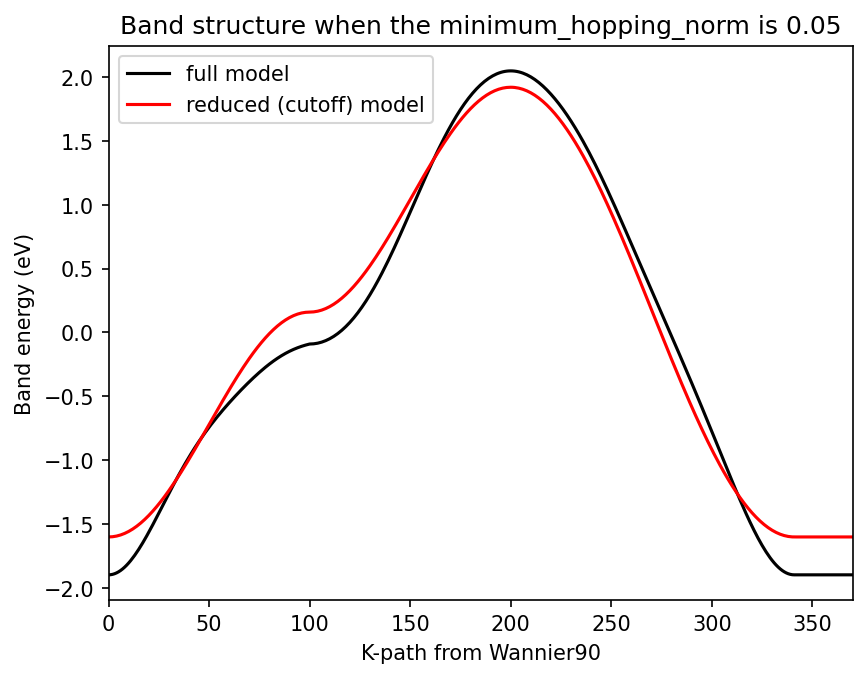

Note that if we decrease the ```min_hopping_norm``` value, to say 0.01 eV, additional terms appear in our Hamiltonian values which results in a cutoff model that closely resembles the full Wannier90 model, that is, the accuracy improves. The figure below shows the band structure when the ```min_hopping_norm``` is 0.01 eV and still without a set ```max_distance``` cutoff.

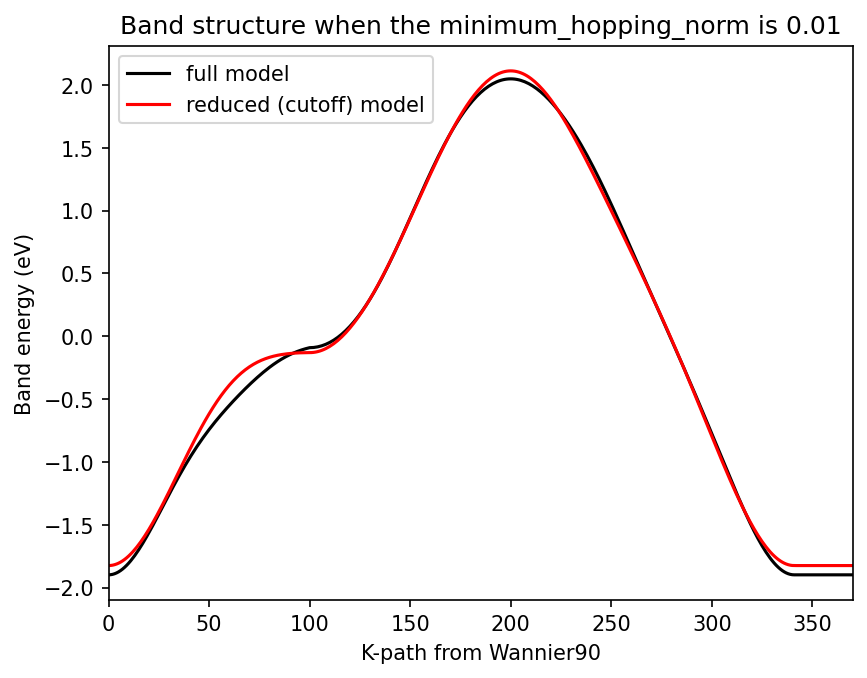


### Conclusion ###
```sympyfy``` is a user-friendly tool that provides a clear and comprehensible representation using the tight-binding model. This bridges the divide between experimental findings and theoretical methods, enabling researchers to swiftly confirm if their results match tight-binding predictions.